In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("/content/scriping-result.csv", encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reference_Number   159 non-null    object 
 1   watch_URL          159 non-null    object 
 2   type               159 non-null    object 
 3   brand              159 non-null    object 
 4   year_introduced    0 non-null      float64
 5   parent_model       159 non-null    object 
 6   specific_model     159 non-null    object 
 7   nickname           159 non-null    object 
 8   marketing_name     0 non-null      float64
 9   style              0 non-null      float64
 10  currency           159 non-null    object 
 11  price              159 non-null    int64  
 12  image_url          159 non-null    object 
 13  made_in            159 non-null    object 
 14  case_shape         159 non-null    object 
 15  Case_material      159 non-null    object 
 16  case_finish        0 non-n

In [ ]:
df.describe()

,year_introduced,marketing_name,style,price,case_finish,bezel_material,bezel_color,weight,frequency,jewels,features
count,0.0,0.0,0.0,159.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,1894.591195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1601.504728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,775.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1110.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2385.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,18450.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Reference_Number       0
watch_URL              0
type                   0
brand                  0
year_introduced      190
parent_model           0
specific_model         0
nickname               0
marketing_name       190
style                190
currency               0
price                190
image_url              0
made_in                0
case_shape             0
Case_material          0
case_finish          190
caseback               0
diameter               0
between_lugs           0
lug_to_lug             0
Case_thickness         0
bezel_material       190
bezel_color          190
crystal                1
water_resistance       0
weight               190
dial_color             0
numerals               0
bracelet_material      0
bracelet_color         0
clasp_type             0
movement               0
caliber                0
power_reserve        127
frequency            190
jewels               190
features             190
description            0
short_description    145


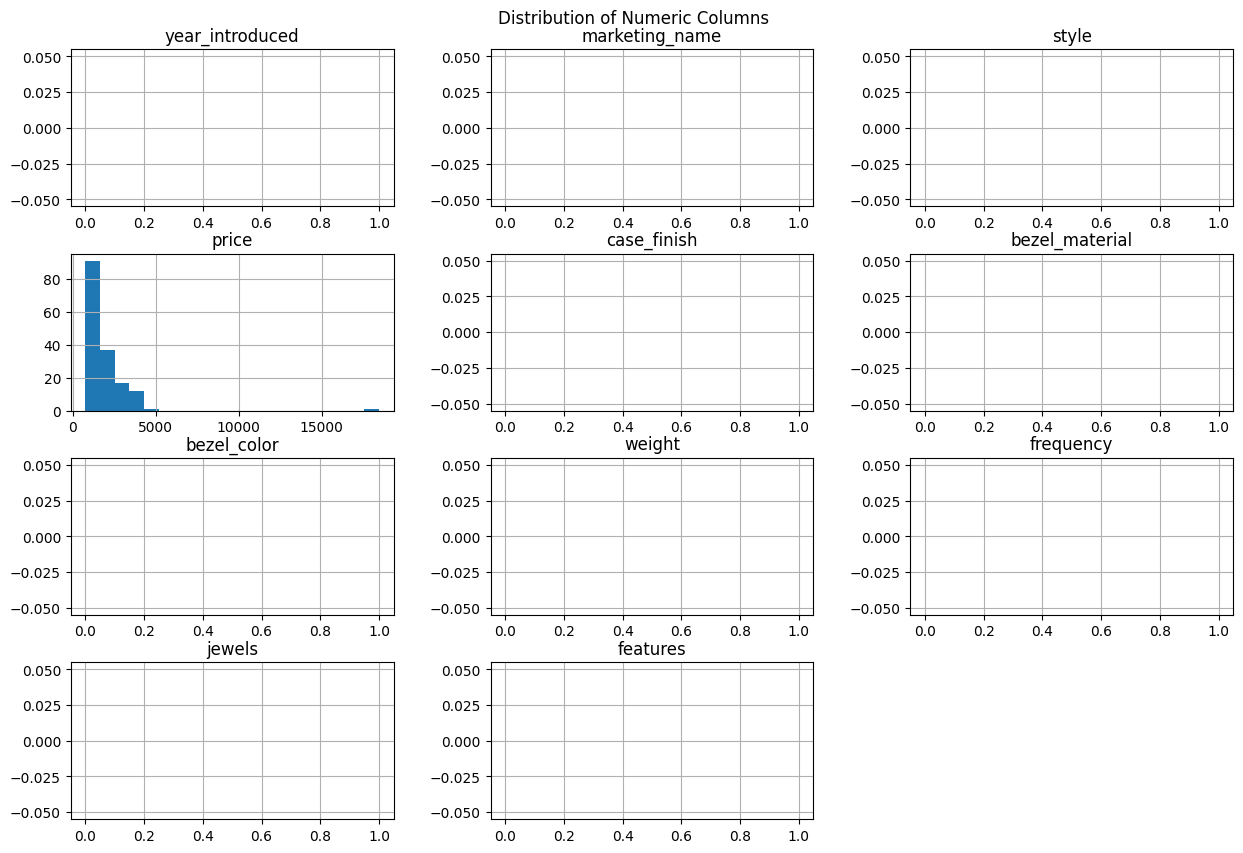

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Columns', y=0.92)
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


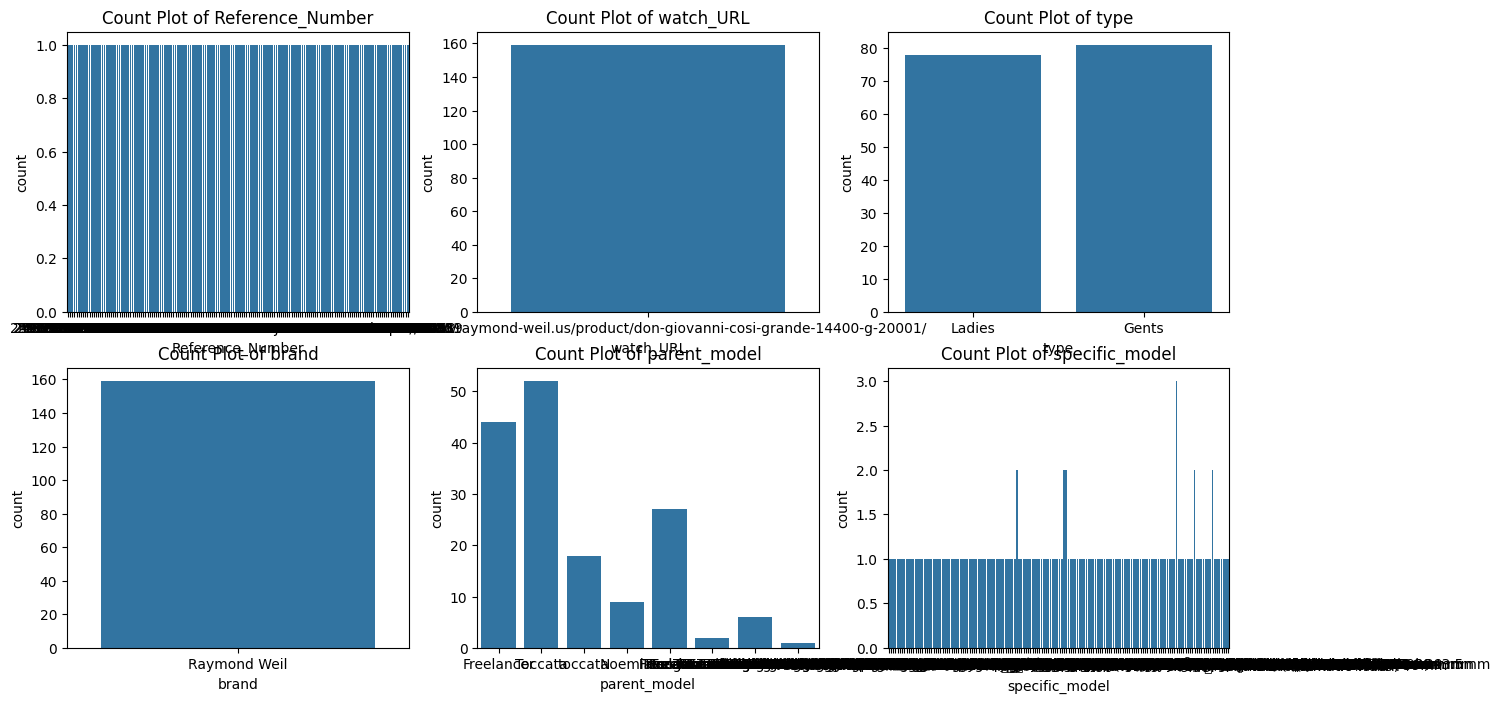

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
print(df['watch_URL'].to_list())

['https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-cosi-grande-14400-g-20001/', 'https://www.raymond-weil.us/product/don-giovanni-c

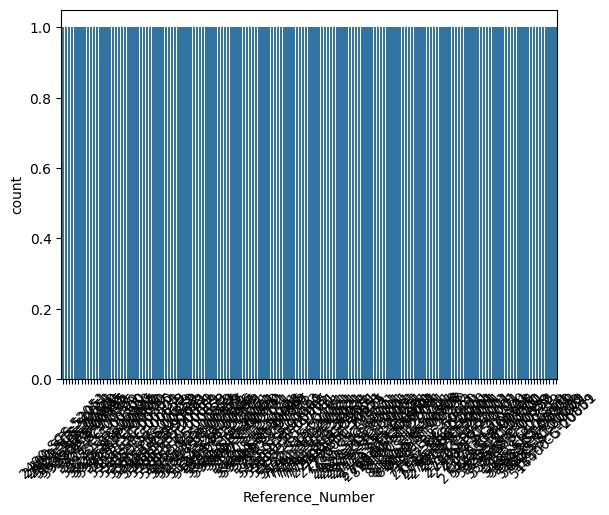

In [ ]:
sns.countplot(x = 'Reference_Number', data = df)
plt.xticks(rotation=45)
plt.show()

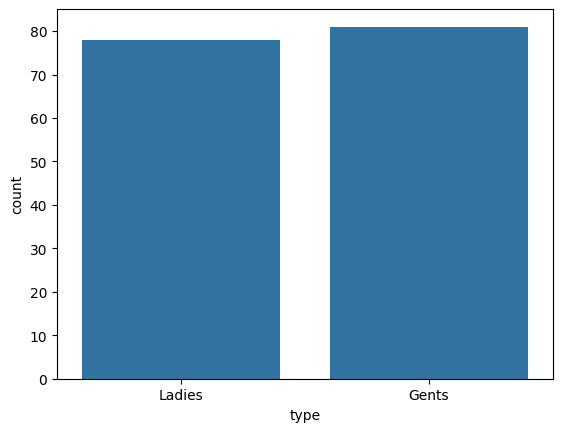

In [ ]:
sns.countplot(x = 'type', data = df)
plt.show()

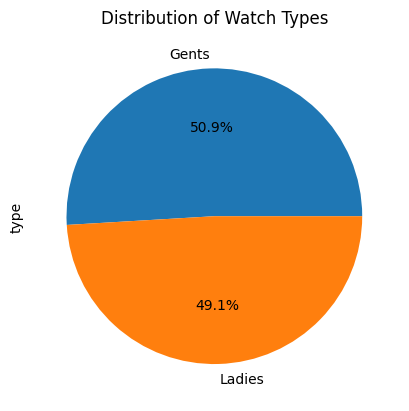

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Watch Types")
plt.show()

In [ ]:
brand_counts = df['brand'].value_counts()
print(brand_counts)

Raymond Weil    159
Name: brand, dtype: int64


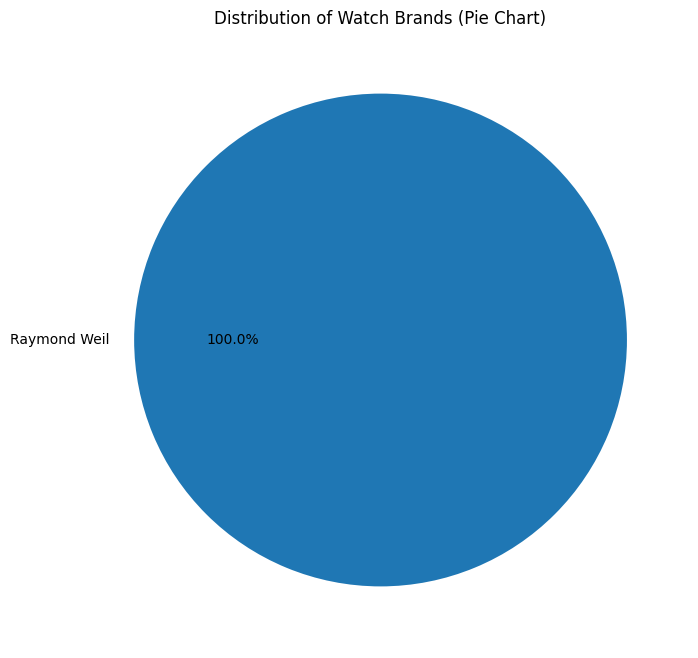

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct="%1.1f%%")
plt.title('Distribution of Watch Brands (Pie Chart)')
plt.show()

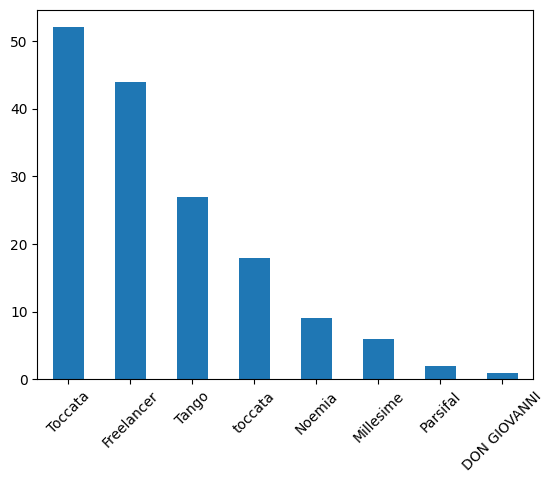

In [ ]:
df['parent_model'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


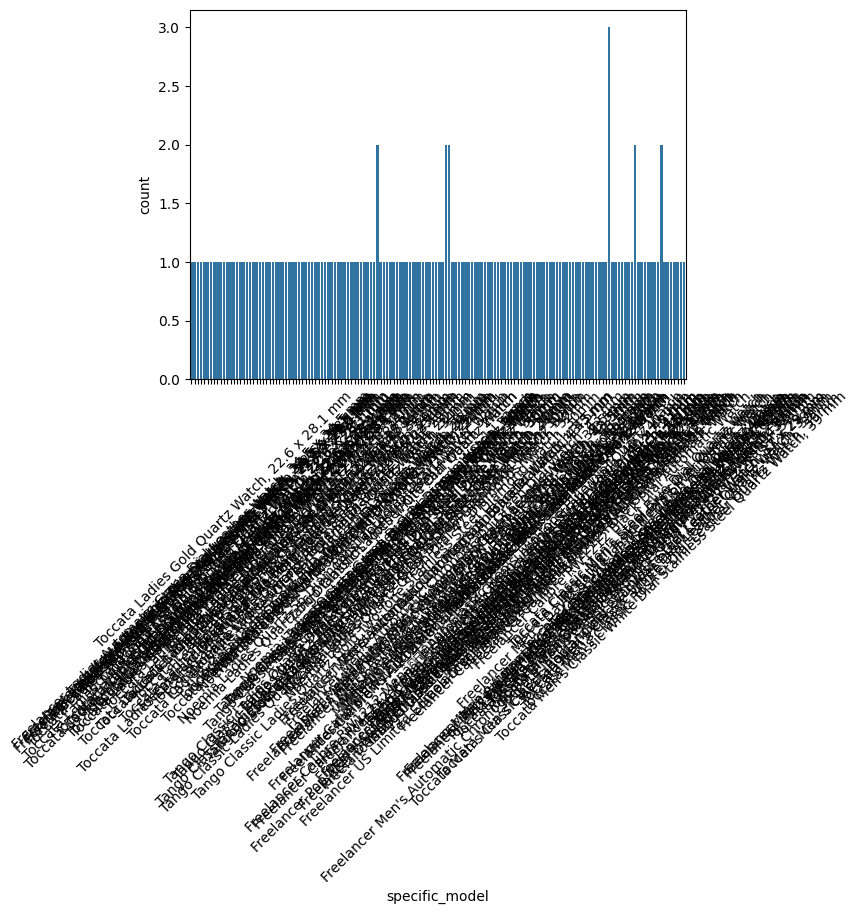

In [ ]:
sns.countplot(x = 'specific_model', data = df)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


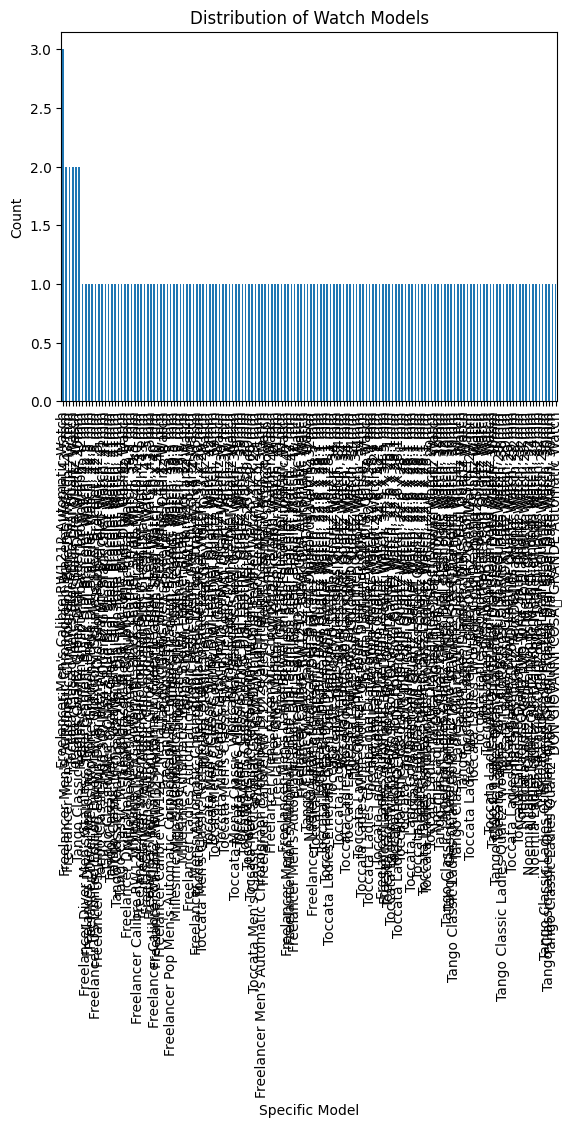

In [ ]:
df['specific_model'].value_counts().plot(kind='bar')
plt.xlabel('Specific Model')
plt.ylabel('Count')
plt.title('Distribution of Watch Models')
plt.show()

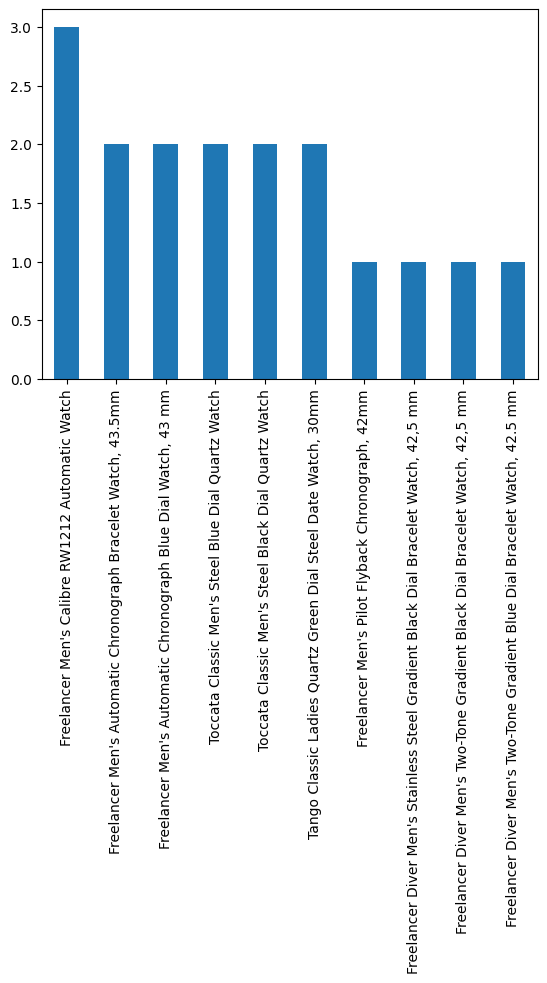

In [ ]:
df['nickname'].value_counts().head(10).plot(kind='bar')
plt.show()

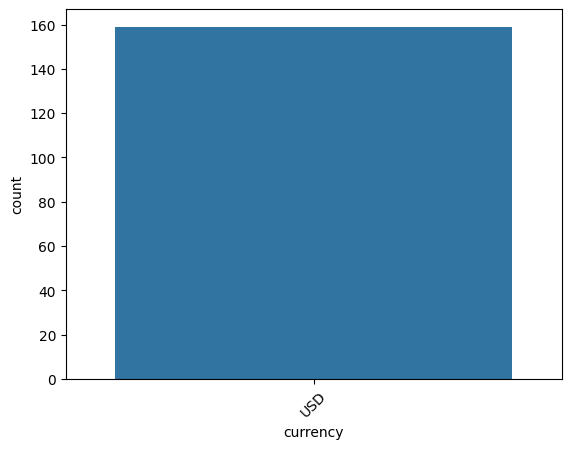

In [ ]:
sns.countplot(x = 'currency', data = df)
plt.xticks(rotation=45)
plt.show()

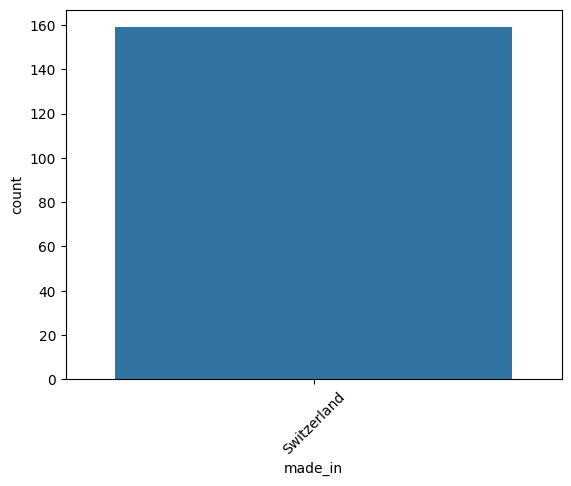

In [ ]:
sns.countplot(x = 'made_in', data = df)
plt.xticks(rotation=45)
plt.show()

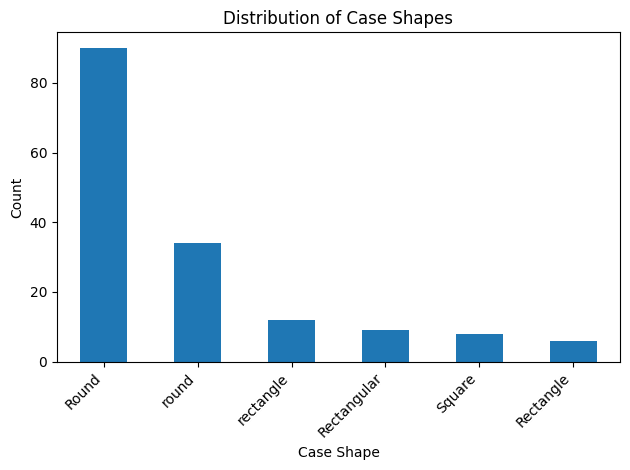

In [ ]:
df['case_shape'].value_counts().plot(kind='bar')
plt.xlabel('Case Shape')
plt.ylabel('Count')
plt.title('Distribution of Case Shapes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


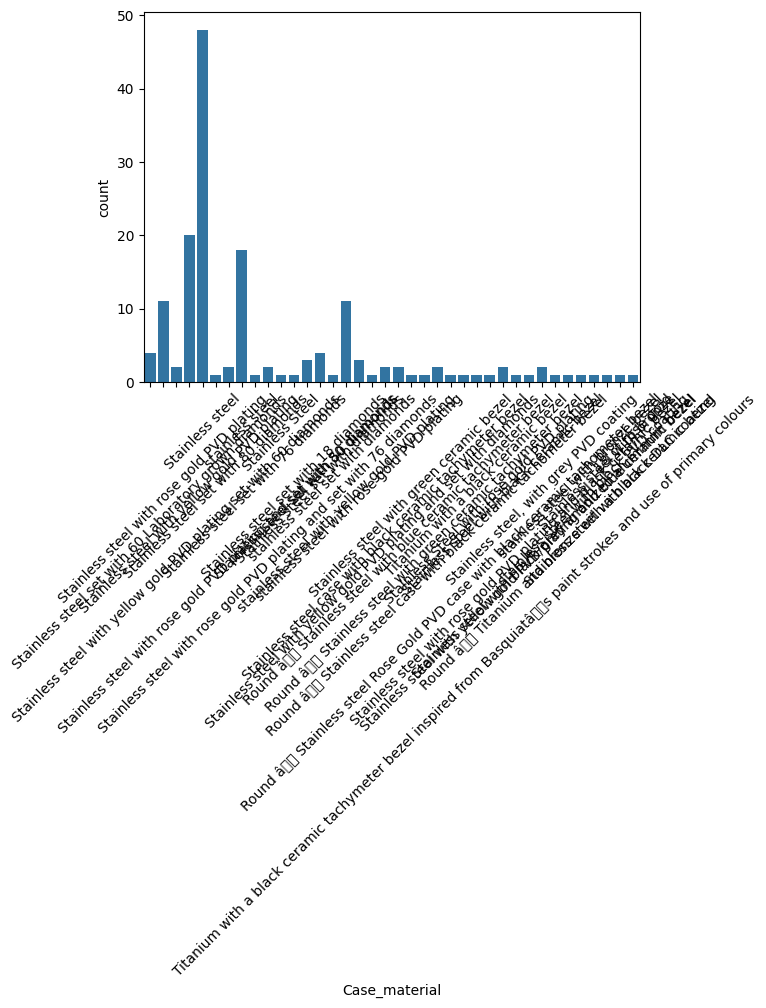

In [ ]:
sns.countplot(x = 'Case_material', data = df)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


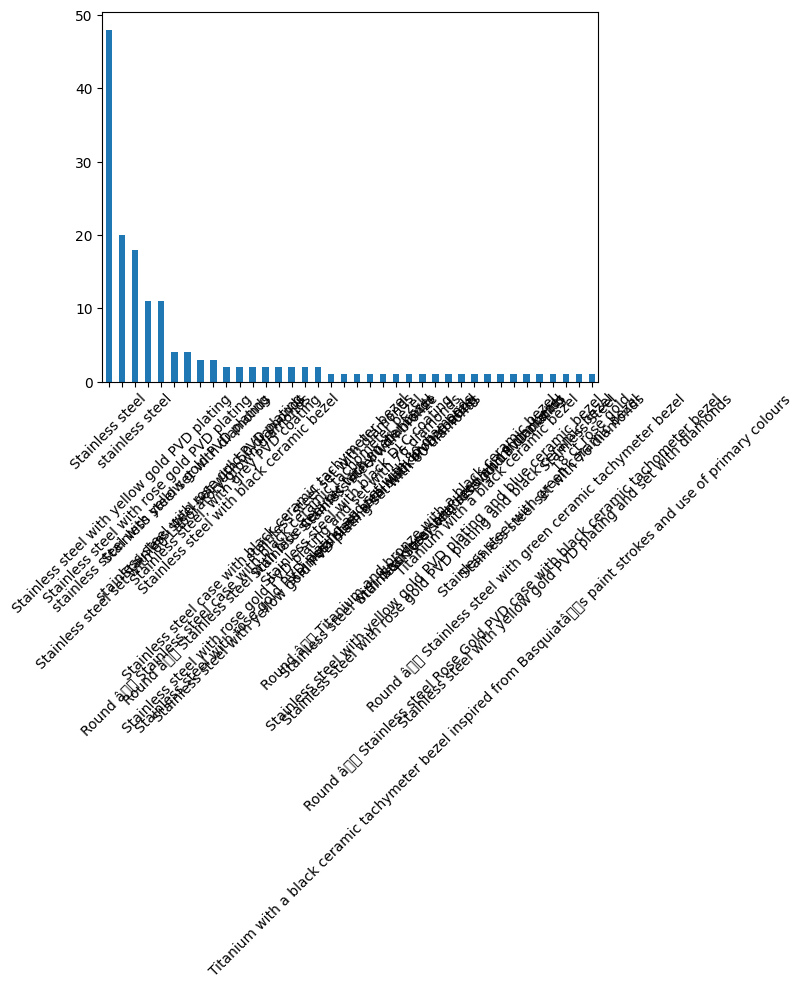

In [ ]:
df['Case_material'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


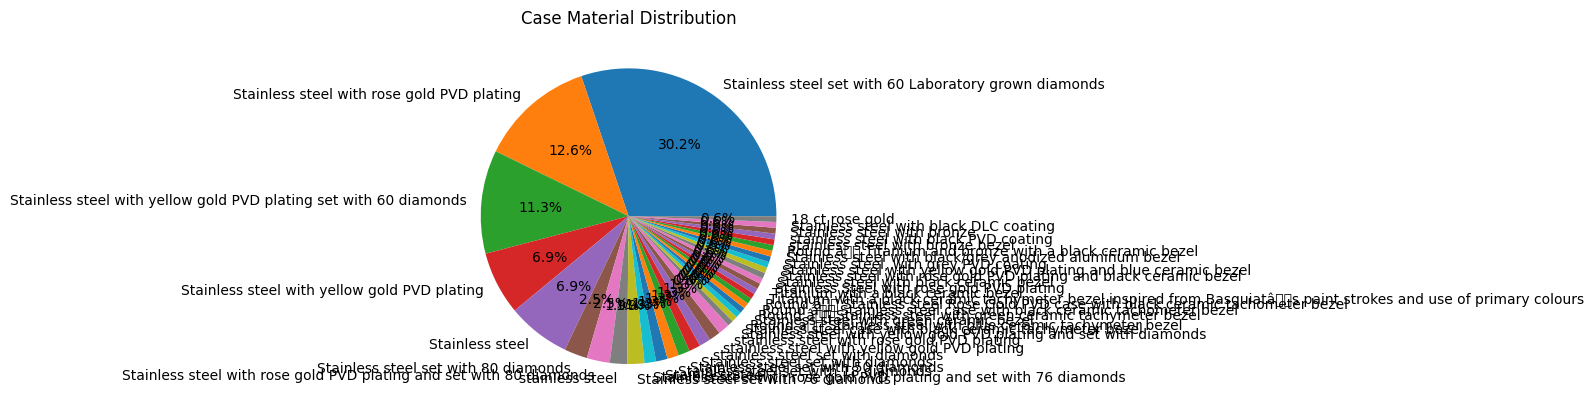

In [ ]:
plt.pie(df['Case_material'].value_counts(), labels=df['Case_material'].unique(), autopct="%1.1f%%")
plt.title("Case Material Distribution")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


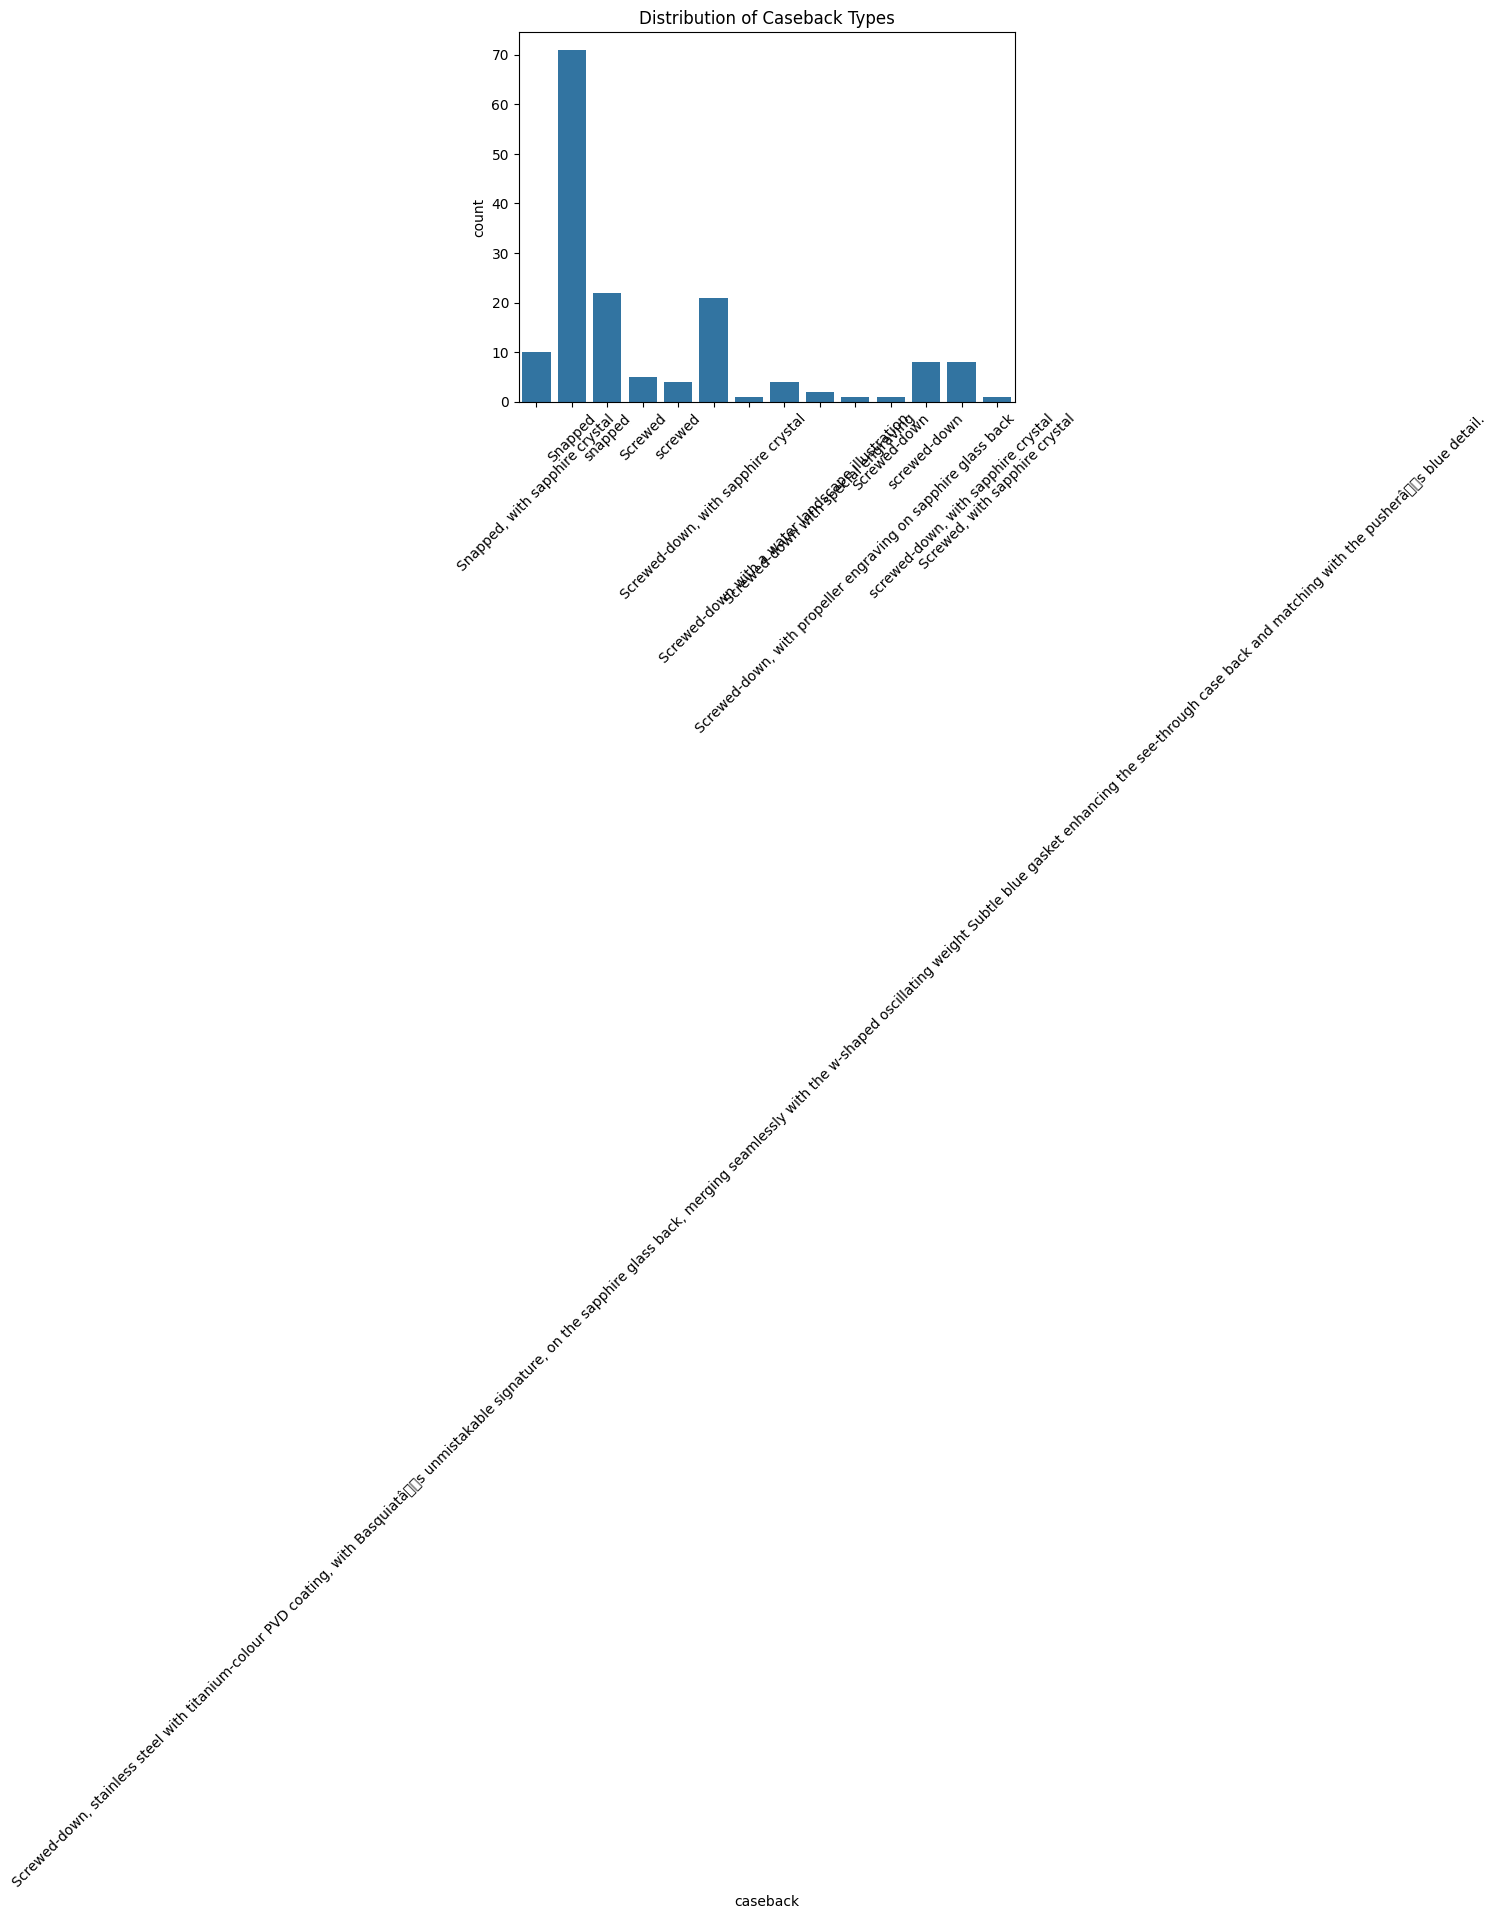

In [ ]:
sns.countplot(x = 'caseback', data = df)
plt.xticks(rotation=45)
plt.title("Distribution of Caseback Types")
plt.show()

In [ ]:
df.describe()
df['price'].mean()

1894.5911949685535

In [ ]:
df.corr()
df[['price', 'diameter']].corr()

<ipython-input-25-a50da2767d52>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-25-a50da2767d52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[['price', 'diameter']].corr()


,price
price,1.0


In [ ]:
df.groupby('Case_material')['price'].mean()

Case_material
Polished and satinated stainless steel                                                                                NaN
Polished steel with rose gold PVD coating and set with 62 diamonds                                                    NaN
Polished steel with rose gold PVD plating                                                                             NaN
Round â Bronze with a black ceramic tachymeter bezel                                                                NaN
Round â Polished and satin finished stainless steel with titanium-coloured PVD coating                              NaN
Round â Stainless steel case with black ceramic tachometer bezel                                                    NaN
Round â Stainless steel with green ceramic tachometer bezel                                                         NaN
Round â Titanium and bronze with a black ceramic bezel                                                              NaN
Stainless 

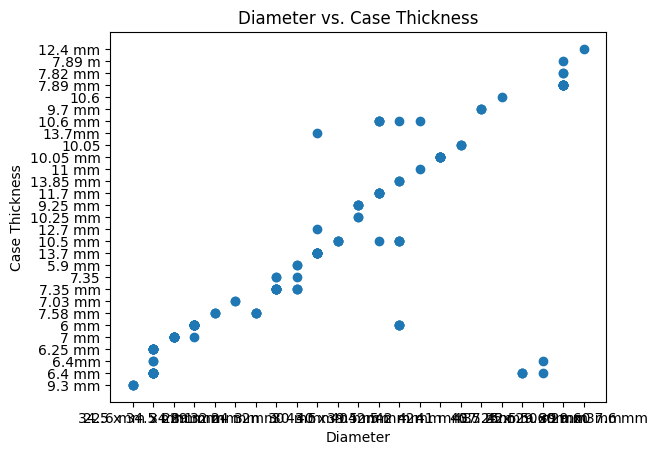

In [ ]:
plt.scatter(df['diameter'], df['Case_thickness'])
plt.xlabel('Diameter')
plt.ylabel('Case Thickness')
plt.title('Diameter vs. Case Thickness')
plt.show()

In [ ]:
contingency_table = pd.crosstab(df['Case_material'], df['made_in'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 0.0, p-value: 1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful